<center><h1>Mini Project 4</h1></center>
<center><h2>Watchanan Chantapakul (<a href="mailto:wcgzm@umsystem.edu"><code>wcgzm</code></a>)</h2></center>
<hr />

In [1]:
import numpy as np
from IPython.display import display, Math
import matplotlib.pyplot as plt

In [2]:
class1_samples = np.array([
    [0.42, -0.087, 0.58],
    [-0.2, -3.3, -3.4],
    [1.3, -0.32, 1.7],
    [0.39, 0.71, 0.23],
    [-1.6, -5.3, -0.15],
    [-0.029, 0.89, -4.7],
    [-0.23, 1.9, 2.2],
    [0.27, -0.3, -0.87],
    [-1.9, 0.76, -2.1],
    [0.87, -1.0, -2.6]
])

class2_samples = np.array([
    [-0.4, 0.58, 0.089],
    [-0.31, 0.27, -0.04],
    [0.38, 0.055, -0.035],
    [-0.15, 0.53, 0.011],
    [-0.35, 0.47, 0.034],
    [0.17, 0.69, 0.1],
    [-0.011, 0.55, -0.18],
    [-0.27, 0.61, 0.12],
    [-0.065, 0.49, 0.0012],
    [-0.12, 0.054, -0.063]
])

class3_samples = np.array([
    [0.83, 1.6, -0.014],
    [1.1, 1.6, 0.48],
    [-0.44, -0.41, 0.32],
    [0.047, -0.45, 1.4],
    [0.28, 0.35, 3.1],
    [-0.39, -0.48, 0.11],
    [0.34, -0.079, 0.14],
    [-0.3, -0.22, 2.2],
    [1.1, 1.2, -0.46],
    [0.18, -0.11, -0.49]
])

samples = np.array([class1_samples, class2_samples, class3_samples])

In [3]:
def answer(text, ans):
    if type(ans) == np.ndarray:
        t = r'\begin{bmatrix} '
        for i in ans:
#             print(i, type(i))
#             print(r' \\ '.join(i))
            if type(i) != np.ndarray:
                t += f'{i:.4f}' + r' \\ '
            else:
                a_str = np.array2string(i, precision=4, separator=r' & ')
                t += a_str[1:-1]
                t += r' \\ '
        t += r'\end{bmatrix}'
        display(Math(f'{text} = {t}'))
    else:
        display(Math(f'{text} = {ans:.4f}'))

## Questions 1

Consider Gaussian density models in different dimensions.

## (a)
Write a program to find the maximum-likelihood values $\hat{\mu}$ and $\hat{\sigma}^2$. Apply your program individually to each of the three features $x_i$ of category $\omega_1$ in the table above.

In [4]:
def mean(samples):
    return np.sum(samples) / np.size(samples)

In [5]:
a_samples1 = class1_samples[:, 0]
a_samples2 = class1_samples[:, 1]
a_samples3 = class1_samples[:, 2]

In [6]:
a_mu1 = mean(a_samples1)
a_mu2 = mean(a_samples2)
a_mu3 = mean(a_samples3)

In [7]:
answer("\mu_1", a_mu1)
answer("\mu_2", a_mu2)
answer("\mu_3", a_mu3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Right here, the unbiased estimator of the population variance is used.

In [8]:
def variance(samples, mean):
    return np.sum((samples - mean) ** 2) / (np.size(samples) - 1)

In [9]:
a_var1 = variance(a_samples1, a_mu1)
a_var2 = variance(a_samples2, a_mu2)
a_var3 = variance(a_samples3, a_mu3)

In [10]:
answer("\sigma_1^2", a_var1)
answer("\sigma_2^2", a_var2)
answer("\sigma_3^2", a_var3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (b)

Modify your program to apply to two-dimensional Gaussian data $p(x) \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$. Apply your data to each of the three possible pairings of two features for $\omega_1$.

`samples1` consists of feature 1 and 2 for $\omega_1$

`samples2` consists of feature 1 and 3 for $\omega_1$

`samples3` consists of feature 2 and 3 for $\omega_1$

In [11]:
b_samples1 = class1_samples[:, [0, 1]]
b_samples2 = class1_samples[:, [0, 2]]
b_samples3 = class1_samples[:, [1, 2]]

In [12]:
def b_mean(samples):
    return np.sum(samples, axis=0) / samples.shape[0]

In [13]:
b_mu1 = b_mean(b_samples1)
b_mu2 = b_mean(b_samples2)
b_mu3 = b_mean(b_samples3)

In [14]:
answer(r"\vec{\mu}_1", b_mu1)
answer(r"\vec{\mu}_2", b_mu2)
answer(r"\vec{\mu}_3", b_mu3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
def b_covariance(samples, mu):
    cov = np.zeros((len(mu), len(mu)))
    for x in samples:
        diff = x - mu
        cov += diff[:, None] @ diff.T[None, :]
    cov /= len(samples) - 1
    return cov

In [16]:
b_cov1 = b_covariance(b_samples1, b_mu1)
b_cov2 = b_covariance(b_samples2, b_mu2)
b_cov3 = b_covariance(b_samples3, b_mu3)

In [17]:
# np.cov(samples1.T, ddof=1)

In [18]:
answer("\Sigma_1", b_cov1)
answer("\Sigma_2", b_cov2)
answer("\Sigma_3", b_cov3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (c)

Modify your program to apply to three-dimensional Gaussian data. Apply your program to the full three-dimensional data for $\omega_1$.

In [19]:
c_samples = class1_samples

We can use the function in sub-question (b).

In [20]:
# np.cov(c_samples.T, ddof=1)

In [21]:
c_mu = b_mean(c_samples)

In [22]:
answer(r"\vec{\mu}", c_mu)

<IPython.core.display.Math object>

In [23]:
c_cov = b_covariance(c_samples, c_mu)

In [24]:
answer("\Sigma", c_cov)

<IPython.core.display.Math object>

## (d)

Assume your three-dimensional model is separable, so that
$$ \mathbf{\Sigma} = diag(\sigma_1^2, \sigma_2^2, \sigma_3^2). $$
Write a program to estimate the mean and the diagonal components of $\mathbf{\Sigma}$. Apply your program to the data in $\omega_2$.

In [25]:
d_samples1 = class2_samples[:, 0]
d_samples2 = class2_samples[:, 1]
d_samples3 = class2_samples[:, 2]

In [26]:
d_mu1 = mean(d_samples1)
d_mu2 = mean(d_samples2)
d_mu3 = mean(d_samples3)

In [27]:
answer("\mu_1", d_mu1)
answer("\mu_2", d_mu2)
answer("\mu_3", d_mu3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
d_var1 = variance(d_samples1, d_mu1)
d_var2 = variance(d_samples2, d_mu2)
d_var3 = variance(d_samples3, d_mu3)

In [29]:
answer("\sigma_1^2", d_var1)
answer("\sigma_2^2", d_var2)
answer("\sigma_3^2", d_var3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
d_cov = np.identity(3) * np.array([d_var1, d_var2, d_var3])

In [31]:
answer("\Sigma", d_cov)

<IPython.core.display.Math object>

## (e) Compare your results for the mean of each feature $\mu_i$ calculated in the above ways. Explain why they are the same or different.

Since we calculate a mean for each dimension, it can be combined to form a higher dimensional mean.

Questions a, b, and c are about $\omega_1$. We can structure the mean as follows:

**Question a) 1-d feature**

$$ \mu_1^{(1)} = −0.0709 $$

$$ \mu_2^{(1)} = −0.6047 $$

$$ \mu_3^{(1)} = −0.9110 $$


**Question b) 2-d feature**

$$
\vec{\mu}_1^{(2)} = 
\begin{bmatrix}
\mu_1^{(1)}\\
\mu_2^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
−0.0709\\
−0.6047
\end{bmatrix}
$$


$$ \vec{\mu}_2^{(2)} = 
\begin{bmatrix}
\mu_1^{(1)}\\
\mu_3^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
−0.0709\\
−0.9110
\end{bmatrix}
$$

$$ \vec{\mu}_3^{(2)} = 
\begin{bmatrix}
\mu_2^{(1)}\\
\mu_3^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
−0.6047\\
−0.9110
\end{bmatrix}
$$

**Question c) 3-d feature**

$$ \vec{\mu}^{(3)} = 
\begin{bmatrix}
\mu_1^{(1)}\\
\mu_2^{(1)}\\
\mu_3^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
−0.0709\\
−0.6047\\
−0.9110
\end{bmatrix}
$$

However, for **question d**, it is about $\omega_2$, so, the mean value is different from question a, b, and c.

## (f) Compare your results for the variance of each feature $\sigma_i^2$ calculated in the above ways. Explain way they are the same or different.

Just like the mean, 1-d variance can constitute higher-dimensional variance (covariance matrix). We can see the pattern as follows:

**Question a) 1-d feature**

$$ \sigma_1^2 = 1.0069 $$

$$ \sigma_2^2 = 4.6675 $$

$$ \sigma_3^2 = 5.0466 $$

**Question b) 2-d feature**

$$ \mathbf{\Sigma_1} =
\begin{bmatrix}
\sigma_1^2 & \sigma_{12}\\
\sigma_{21} & \sigma_2^2\\
\end{bmatrix}
=
\begin{bmatrix}
1.0069 & 0.6309\\
0.6309 & 4.6675\\
\end{bmatrix}
$$

$$ \mathbf{\Sigma_2} =
\begin{bmatrix}
\sigma_1^2 & \sigma_{13}\\
\sigma_{31} & \sigma_3^2\\
\end{bmatrix}
=
\begin{bmatrix}
1.0069 & 0.4379\\
0.4379 & 5.0466\\
\end{bmatrix}
$$

$$ \mathbf{\Sigma_3} =
\begin{bmatrix}
\sigma_2^2 & \sigma_{23}\\
\sigma_{32} & \sigma_3^2\\
\end{bmatrix}
=
\begin{bmatrix}
4.6675 & 0.8152\\
0.8152 & 5.0466\\
\end{bmatrix}
$$

**Question c) 3-d feature**

$$ \mathbf{\Sigma} =
\begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13}\\
\sigma_{21} & \sigma_2^2 & \sigma_{23}\\
\sigma_{31} & \sigma_{32} & \sigma_3^2\\
\end{bmatrix}
=
\begin{bmatrix}
1.0069 & 0.6309 & 0.4379\\
0.6309 & 4.6675 & 0.8152\\
0.4379 & 0.8152 & 5.0466\\
\end{bmatrix}
$$

**Question d)**

Since we use the data in $\omega_2$ instead of $\omega_1$, obviously, the variances are different from question a, b, and c.
The covariance matrix $\mathbf{\Sigma}$ in **question d** is also a diagonal matrix that only contains the variances, not covariances.

# Question 2

Consider a one-dimensional model of a triangular density governed by two scalar parameters:
$$
p(x|\mathbf{\theta}) \equiv T(\mu, \delta) = 
\begin{cases}
  \frac{\delta - |x - \mu|}{\delta^2} & \text{for $|x - \mu| < \delta$} \\
  0 & \text{otherwise,}
\end{cases}
$$
where $\mathbf{\theta} =
\begin{pmatrix}
  \mu \\ 
  \delta
\end{pmatrix} $.
Write a program to calculate the density $p(x|\mathcal{D})$ via Bayesian methods (Eq. 25) and apply it to the $x_2$ feature of category $\omega_2$. Assume your priors on the parameters are uniform throughout the range of the data. Plot your resulting posterior density $p(x|\mathcal{D})$.

<hr>
I will show two different methods to tackle this question 2.

1. Estimating one parameter at a time, and then using the estimated parameters to compute the desired class-conditional density $p(x|D)$
2. Deriving a close form of the desired class-conditional density $p(x|D)$ with double integrals

<hr>

### Get the feature $x_2$ from $\omega_2$

In [32]:
D = class2_samples[:, 1]
D

array([0.58 , 0.27 , 0.055, 0.53 , 0.47 , 0.69 , 0.55 , 0.61 , 0.49 ,
       0.054])

## [METHOD 1]

## Triangular Density

In [33]:
def likelihood_dist(x, mu, delta):
    if np.abs(x - mu) < delta:
        return (delta - np.abs(x - mu)) / (delta ** 2)
    return 0

### Try plotting a triangular density

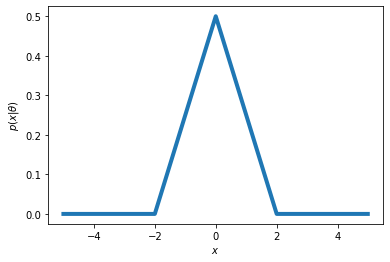

In [34]:
fig, ax = plt.subplots()
X = np.arange(-5, 5, 0.01)
Y = [likelihood_dist(x, 0, 2) for x in X]
ax.plot(X, Y, linewidth=4)
ax.set_xlabel("$x$")
ax.set_ylabel(r"$p(x|\theta)$")
plt.show()

## Uniform Distribution

In [35]:
def prior_dist(x, a, b):
    if a <= x and x <= b:
        return 1. / (b - a)
    return 0

### Try plotting a uniform distribution

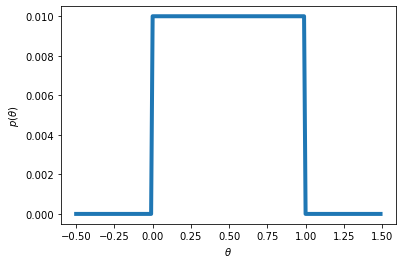

In [36]:
fig, ax = plt.subplots()
X = np.arange(-0.5, 1.5, 0.01)
Y = [prior_dist(x, 0, 1) for x in X]
Y /= np.sum(Y)
ax.plot(X, Y, linewidth=4)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")
plt.show()

## Bayesian estimation (BE)
Unlike maximum likelihood approach that considers $\theta$ to be fixed, Bayesian estimation treats $\theta$ as a random variable. So, we need to find a distribution of the random variable—parameter distribution.

We assume that the parametric form of the density $p(x|\mathbf{\theta})$ is known. In this case, $p(x|\mathbf{\theta})$ is a triangular density function. But we want to find the value of the parameter vector $\mathbf{\theta}$.


We can compute $p(x|D)$ from $p(x|\theta)$ and $P(\theta|D)$ as given by:

$$\begin{align}
p(x|D) &= \int p(x, \theta | D) \,d\theta\\
&= \int p(x | \theta, D) p(\theta | D) \,d\theta\\
&= \int p(x | \theta) p(\theta | D) \,d\theta\\
\end{align}$$

$p(\theta | D)$ is estimated by using Bayes formula.

$$\begin{align}
p(\theta|D) &= \frac{p(D|\theta)p(\theta)}{p(D)}\\
% &= \alpha \cdot p(D|\theta)p(\theta)\\
\end{align}$$

Training data set $D = \{x_1, \dots, x_n\}$ has $n$ samples. All samples are *i.i.d.* (independent identically distributed random variables). Thus, we can compute $p(D|\theta)$ as follows:

$$\begin{align}
p(D|\theta) &= \prod_{k=1}^{n} p(x_k|\theta)\\
\end{align}$$

We substitute $p(D|\theta)$ back to the $p(\theta|D)$, we get:

$$\begin{align}
% p(\theta|D) &= \alpha \cdot p(D|\theta)p(\theta)\\
p(\theta|D) &= \frac{p(D|\theta)p(\theta)}{p(D)}\\
p(\theta|D) &= \frac{\prod_{k=1}^{n} p(x_k|\theta)p(\theta)}{p(D)}\\
% &= \alpha \cdot \prod_{k=1}^{n} p(x_k|\theta)p(\theta)\\
\end{align}$$

where

$$\begin{align}
p(D) &= \int p(D|\theta)p(\theta)\,dx\\
\end{align}$$

The prior density $p(\theta)$ is given by the question to be an **uniform distribution** over the range of the data. This means the prior is **uninformative**.

$$\begin{align}
p(\theta) &= \mathcal{U}(0.054, 0.69)
=\begin{cases}
  \frac{1}{0.69-0.054} & \text{for $0.054 \leq \theta \leq 0.69$} \\
  0 & \text{otherwise,}
\end{cases}
\\
\end{align}$$

We also know $p(x|\theta)$ as it is provided by the question.

The range of the input data is as follows:

In [37]:
D.min(), D.max()

(0.054, 0.69)

## 1) Estimate $\mu$ by fixing $\delta = 2$

So, our $\theta$ is just $\mu$. Assume that the width of the likelihood (triangular) density is 2.

In [38]:
initial_delta = 2

### A Priori Density $p(\theta) = p(\mu)$

In [39]:
mu = np.arange(0, 1.001, 0.001)

Since, we are using uninformative prior (uniform) throughout the range of the data.

In [40]:
U_a = D.min()
U_b = D.max()

In [41]:
pTheta = [prior_dist(m, U_a, U_b) for m in mu]
pTheta /= np.sum(pTheta)

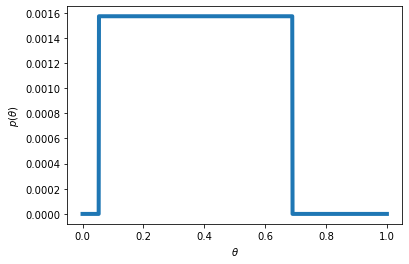

In [42]:
fig, ax = plt.subplots()
X = mu
Y = pTheta
ax.plot(X, Y, linewidth=4)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")
plt.show()

Check the a priori density $p(\theta)$ sum to $1$.

In [43]:
np.sum(pTheta)

0.9999999999999996

### Compute $p(\theta|D) = p(\mu|D)$

In [44]:
posteriors = []
for m, p_theta in zip(mu, pTheta):
    p_theta_D_posterior = 1
    for x in D:
        p_theta_D_posterior *= likelihood_dist(x, m, initial_delta)
    p_theta_D_posterior *= p_theta
    posteriors.append(p_theta_D_posterior)

posteriors = np.array(posteriors) / np.sum(posteriors)

Check the posterior density $p(\theta|D)$ sum to $1$.

In [45]:
np.sum(posteriors)

1.0000000000000002

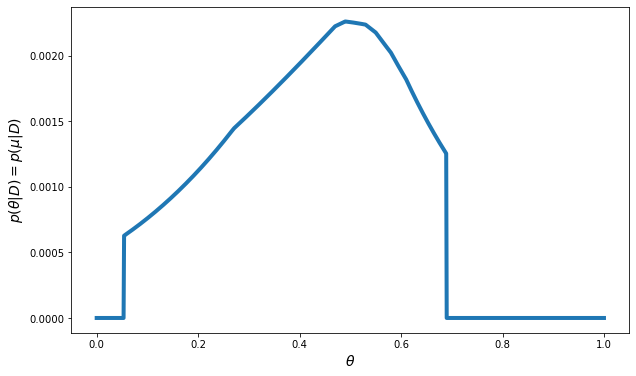

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mu, posteriors, linewidth=4)
ax.set_xlabel(r"$\theta$", size=14)
ax.set_ylabel(r"$p(\theta|D) = p(\mu|D)$", size=14)
plt.show()

## Posterior density $p(x|D)$ after estimating $\mu$

In [47]:
X = np.arange(-3, 3.5, 0.001)
Y = []

for x in X:
    p_x_D = 0
    for m, p in zip(mu, posteriors):
        p_x_D += likelihood_dist(x, m, initial_delta) * p
    Y.append(p_x_D)

Y /= np.sum(Y)

Below is the plot of $p(x|D)$ with the estimated$\hat{\mu}$ but the fixed $\delta$.

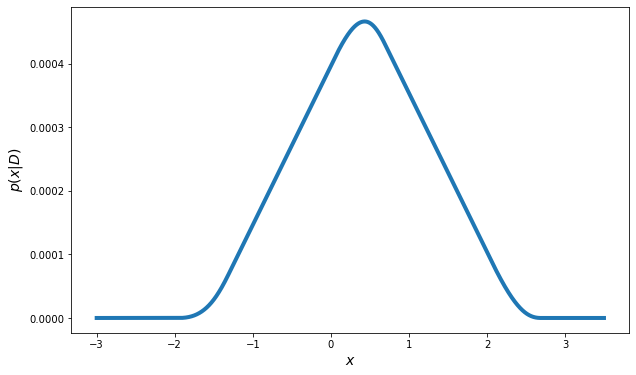

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, Y, linewidth=4)
ax.set_xlabel(r"$x$", size=14)
ax.set_ylabel(r"$p(x|D)$", size=14)
plt.show()

Check thedesired class-conditional density $p(x|D)$ sum to $1$.

In [49]:
np.sum(Y)

0.9999999999999999

We can also verify that the peak of $p(x|D)$ should be around the mean.

In [50]:
f"Mean of {D} = {np.mean(D):.4f}"

'Mean of [0.58  0.27  0.055 0.53  0.47  0.69  0.55  0.61  0.49  0.054] = 0.4299'

The maximum $p(x|D)$ is at $x = 0.4670$ which is close to $0.4299$.

In [51]:
f"Peak at x = {X[np.argmax(Y)]:.4f}"

'Peak at x = 0.4330'

## 2) Estimate $\delta$ by fixing $\mu$

So, our $\theta$ is $\delta$ now. Assume that the center of the likelihhod (triangular) density $\mu = 0.49$ based on the **maximum** posterior density $p(\mu|D)$.


In [52]:
mu_hat = mu[np.argmax(posteriors)]
answer("\hat{\mu}", mu_hat)

<IPython.core.display.Math object>

### A Priori Density $p(\theta) = p(\delta)$

In [53]:
delta = np.arange(-0.3, 1.001, 0.001)

In [54]:
U_a = 0
U_b = D.max() - D.min()

In [55]:
pTheta = [prior_dist(d, U_a, U_b) for d in delta]
pTheta /= np.sum(pTheta)

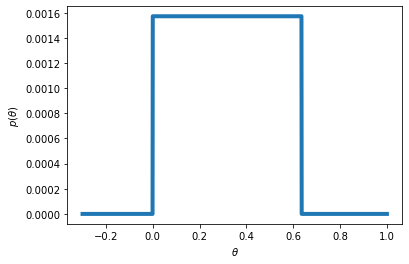

In [56]:
fig, ax = plt.subplots()
X = delta
Y = pTheta
ax.plot(X, Y, linewidth=4)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")
plt.show()

Check the a priori density $p(\theta)$ sum to $1$.

In [57]:
np.sum(pTheta)

1.0

### Compute $p(\theta|D) = p(\delta|D)$

In [58]:
posteriors = []
for d, p_theta in zip(delta, pTheta):
    p_theta_D_posterior = 1
    for x in D:
        p_theta_D_posterior *= likelihood_dist(x, mu_hat, d)
    p_theta_D_posterior *= p_theta
    posteriors.append(p_theta_D_posterior)

posteriors = np.array(posteriors) / np.sum(posteriors)

Check the posterior density $p(\theta|D)$ sum to $1$.

In [59]:
np.sum(posteriors)

1.0

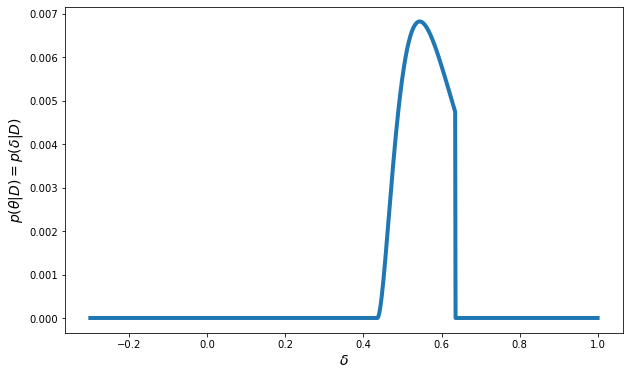

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(delta, posteriors, linewidth=4)
ax.set_xlabel(r"$\delta$", size=14)
ax.set_ylabel(r"$p(\theta|D) = p(\delta|D)$", size=14)
plt.show()

In [61]:
delta_hat = delta[np.argmax(posteriors)]
answer("\hat{\delta}", delta_hat)

<IPython.core.display.Math object>

## Posterior density $p(x|D)$ after estimating $\delta$

In [62]:
X = np.arange(-1.5, 2.5, 0.001)
Y = []

for x in X:
    p_x_D = 0
    for d, p in zip(delta, posteriors):
        p_x_D += likelihood_dist(x, mu_hat, d) * p
    Y.append(p_x_D)

Y /= np.sum(Y)

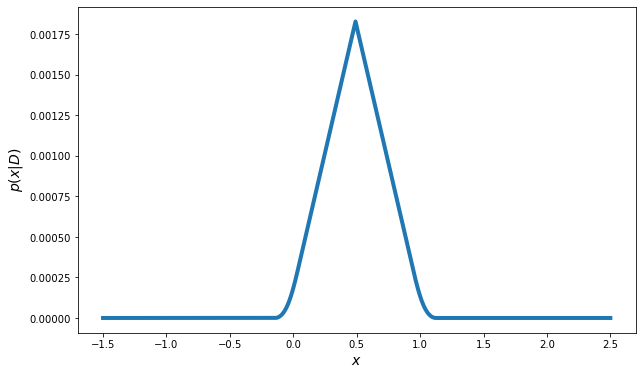

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, Y, linewidth=4)
ax.set_xlabel(r"$x$", size=14)
ax.set_ylabel(r"$p(x|D)$", size=14)
plt.show()

Check the desired class-conditional density $p(x|D)$ sum to $1$.

In [64]:
np.sum(Y)

0.9999999999999998

## The estimated parameters

In [65]:
answer("\hat{\mu}", mu_hat)
answer("\hat{\delta}", delta_hat)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can also get the estimated parameter vector:

$$
\begin{align}
\vec{\theta} &=
\begin{pmatrix}
\hat{\mu}\\
\hat{\delta}
\end{pmatrix}
=
\begin{pmatrix}
0.4900\\
0.5440
\end{pmatrix}
\end{align}
$$

<hr>

## [METHOD 2] Estimating two parameters at the same time

We can compute $p(x|D)$ from $p(x|\theta)$ and $P(\theta|D)$ as given by:

$$\begin{align}
p(x|D) &= \int p(x, \theta | D) \,d\theta\\
&= \int p(x | \theta, D) p(\theta | D) \,d\theta\\
&= \int p(x | \theta) p(\theta | D) \,d\theta\\
\end{align}$$

Since the parameter vector $\vec{\theta}$ has two parameters, $\mu$ and $\delta$, then the desired class-conditional density is:

$$
p(x|D) = \int \int p(x | \mu, \delta) p(\mu, \delta | D) \,d\delta \,d\mu\\
$$

The priors $p(\vec{\theta}|D)$ of the parameters are given by the question to be **uniform** throughout the range of the data. Then the term $p(\vec{\theta}|D)$ or $p(\mu, \delta|D)$ is just a constant $\alpha$. The equation is reduced to:

$$\begin{align}
p(x|D) &= \int \int p(x | \mu, \delta) \mathbf{\alpha} \,d\delta\,d\mu\\
&= \alpha \int \int p(x | \mu, \delta) \,d\delta\,d\mu\\
\end{align}$$

The likelihood density $p(x|\mu, \delta)$ is a density density. We can substitute its definition into $p(x|D)$ as follows:

$$\begin{align}
p(x|D) 
&= \alpha \int \int_{|x - \mu|}^{\delta_{\mathrm{max}}} \frac{\delta - |x - \mu|}{\delta^2} \,d\delta\,d\mu\\
&= \alpha \int \int_{|x - \mu|}^{\delta_{\mathrm{max}}} \left( \frac{1}{\delta} - \frac{|x - \mu|}{\delta^2} \right) \,d\delta\,d\mu\\
&= \alpha \int \int_{|x - \mu|}^{\delta_{\mathrm{max}}} \left( \frac{1}{\delta} - |x - \mu|\delta^{-2} \right) \,d\delta\,d\mu\\
&= \alpha \int \left( \ln{\delta} - (-1)|x - \mu|\delta^{-1} \right) \Big|_{\delta=|x - \mu|}^{\delta_{\mathrm{max}}} \,d\mu\\
&= \alpha \int \left( \ln{\delta} + |x - \mu|\delta^{-1} \right) \Big|_{\delta=|x - \mu|}^{\delta_{\mathrm{max}}} \,d\mu\\
&= \alpha \int \left( \ln{\delta} + \frac{|x - \mu|}{\delta} \right) \Big|_{\delta=|x - \mu|}^{\delta_{\mathrm{max}}} \,d\mu\\
&= \alpha \int \left( \left[ \ln{\delta_{\mathrm{max}}} - \ln{|x - \mu|} \right] + \left[ |x - \mu| \left( \frac{1}{\delta_{\mathrm{max}}} - \frac{1}{|x - \mu|} \right) \right] \right) \,d\mu\\
&= \alpha \int_{x_{\mathrm{max}}}^{x_{\mathrm{min}}} \left( \left[ \ln{\delta_{\mathrm{max}}} - \ln{|x - \mu|} \right] + \left[ |x - \mu| \left( \frac{1}{\delta_{\mathrm{max}}} - \frac{1}{|x - \mu|} \right) \right] \right) \,d\mu\\
\end{align}$$

The value of $|x - \mu|$ can be + or - based on the interval. So the integral is changed the form into:

$$\begin{align}
p(x|D) 
&= \alpha \int_{x_{\mathrm{max}}}^{x} \left( \left[ \ln{\delta_{\mathrm{max}}} - \ln{(x - \mu)} \right] + \left[ (x - \mu) \left( \frac{1}{\delta_{\mathrm{max}}} - \frac{1}{(x - \mu)} \right) \right] \right) \,d\mu\\
&+
\alpha \int_{x}^{x_{\mathrm{min}}} \left( \left[ \ln{\delta_{\mathrm{max}}} - \ln{(\mu - x)} \right] + \left[ (\mu - x) \left( \frac{1}{\delta_{\mathrm{max}}} - \frac{1}{(\mu - x)} \right) \right] \right) \,d\mu\\
\end{align}$$

Next, solving the last integral:

$$\begin{align}
p(x|D) &=
\alpha \left[ \mu \left(\ln \delta_{max} - \frac{1}{2} \right) + (x - \mu) \ln (x - \mu) - (x - \mu) - \frac{(x - \mu)^{2}}{2\delta_{max}} \right]_{\mu = x_{min}}^{x}\\
&+ \alpha \left[ \mu \left(\ln \delta_{max} - \frac{1}{2} \right) - (\mu - x) \ln (\mu - x) + (\mu - x) + \frac{(\mu - x)^{2}}{2\delta_{max}} \right]_{\mu = x}^{x_{max}}\\
\end{align}$$

Plug in the boundary of integral, and move $\alpha$ to the other side, we get:
$$\begin{align}
\frac{p(x|D)}{\alpha} &= \delta_{max} \left( \ln \delta_{max} - \frac{1}{2} \right) - (x_{max} - x) \ln (x_{max} - x) - (x - x_{min}) \ln (x - x_{min})\\
&+ \delta_{max} + \frac{(x_{max} - x)^{2} + (x - x_{min})^{2}}{2\delta_{max}}
\end{align}$$

In [66]:
def ln(x):
    return np.nan_to_num(np.log(x))

def desired_class_conditional_density(x, x_max, delta_max):
    return (delta_max * (ln(delta_max) - 1/2)) - ((x_max - x) * ln(x_max - x)) - ((x - x_min) * ln(x - x_min)) + delta_max + (((x_max - x)**2 + (x - x_min)**2) / (2 * delta_max))

In [67]:
x_min = D.min()
x_max = D.max()
delta_max = x_max - x_min

X = np.arange(D.min(), D.max(), 0.01)
Y = [desired_class_conditional_density(x, x_max, delta_max) for x in X]

<ipython-input-66-1e76a9e6f744>:2: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(x))


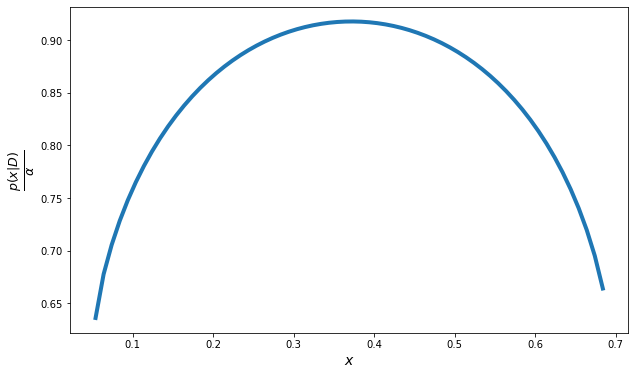

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, Y, linewidth=4)
ax.set_xlabel(r"$x$", size=14)
ax.set_ylabel(r"$\frac{p(x|D)}{\alpha}$", size=18)
plt.show()

Since the desired class-conditional density $p(x|D)$ has a constant $\alpha$ with it, the sum of all x's is not $1$.

In [69]:
x_hat = X[np.argmax(Y)]
answer(r"\hat{x}", x_hat)

<IPython.core.display.Math object>

We can also find $\hat{x} = 0.3740$ which is the value of x with the maximum $\frac{p(x|D)}{\alpha}$.